## Import Libraries

In [30]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

## Load the Data

In [31]:
df = pd.read_csv("cleaned.csv")

In [32]:
df.shape

(7786, 22)

In [33]:
df.head(2)

,Unnamed: 0,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.00000,0.00000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
1,3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.02809,0.05618,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [34]:
# # uniqeness
# df.drop_duplicates(inplace=True)
# df[df.duplicated()]

In [35]:
# # Completeness
# df.isnull().sum()

In [47]:
# # Accurecy types
# df.dtypes
df.drop('name', inplace=True, axis=1)

In [50]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
numeric_features = ['height', 'age', 'appearance', 'goals',
       'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger']
categorical_features = ['team', 'position']

In [51]:
for i in categorical_features:
    print(df[i].value_counts())

team
Daegu FC                          34
FC Volendam                       31
1.FC Köln                         31
Nottingham Forest                 31
Orlando Pirates                   31
                                  ..
Club Athletico Paranaense          4
Clube de Regatas Vasco da Gama     4
América Futebol Clube (MG)         3
Coritiba Foot Ball Club            3
Defensa y Justicia                 3
Name: count, Length: 372, dtype: int64
position
Defender Centre-Back          1403
midfield-CentralMidfield       924
Attack Centre-Forward          917
Goalkeeper                     684
Defender Right-Back            683
midfield-DefensiveMidfield     666
Defender Left-Back             616
Attack-RightWinger             570
midfield-AttackingMidfield     569
Attack-LeftWinger              538
midfield-RightMidfield          68
midfield-LeftMidfield           66
Attack-SecondStriker            47
midfield                        15
Attack                           9
Defender       

In [52]:
df.shape

(7784, 21)

In [40]:
# Calculate the frequency of each 'Type'
type_counts = df['team'].value_counts()

# Filter 'Type' values that appear 10 or more times
df = df[df['team'].isin(type_counts[type_counts >= 2].index)]

In [42]:
df.head(2)

,Unnamed: 0,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.00000,0.00000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
1,3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.02809,0.05618,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0


In [43]:
df.shape

(7784, 22)

In [83]:
# # Calculate the frequency of each 'Make'
# make_counts = df['Make'].value_counts()

# # Filter 'Type' values that appear 10 or more times
# df = df[df['Make'].isin(make_counts[make_counts >=2].index)]

In [53]:
df.shape

(7784, 21)

In [54]:
#df[df['Type']=='Other']

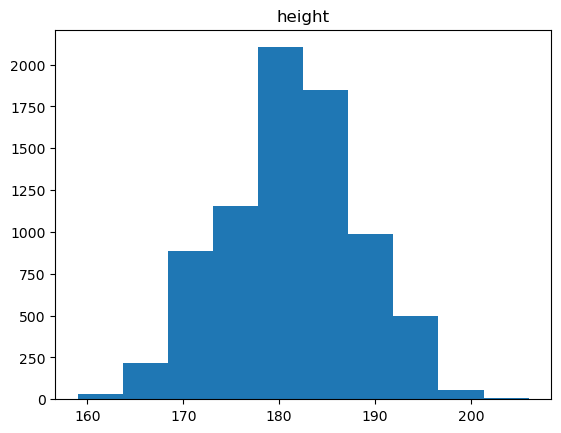

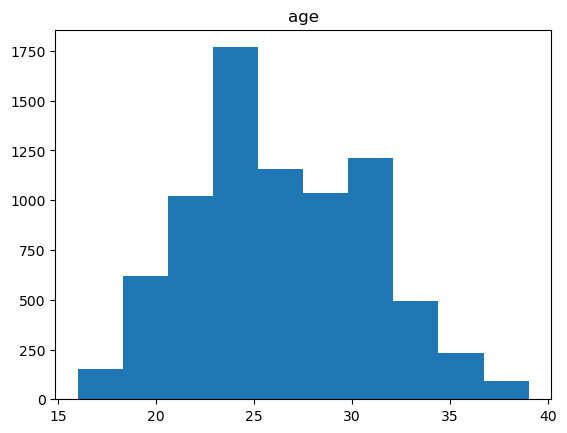

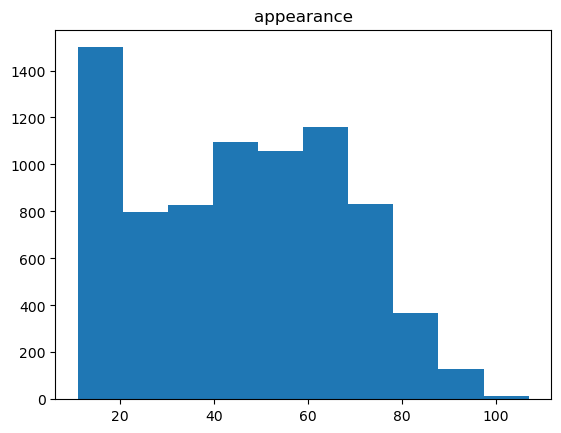

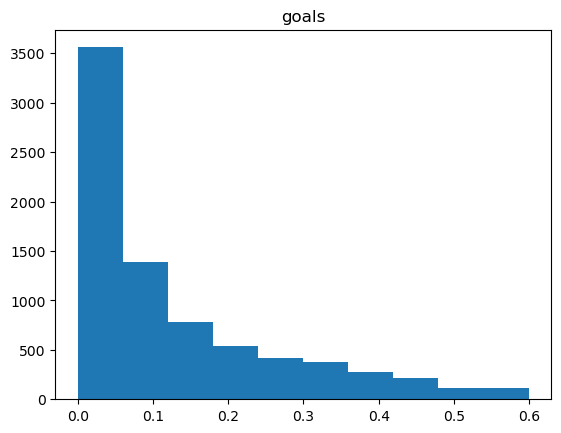

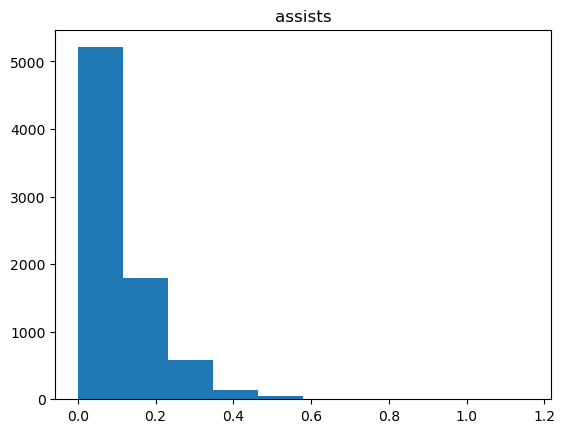

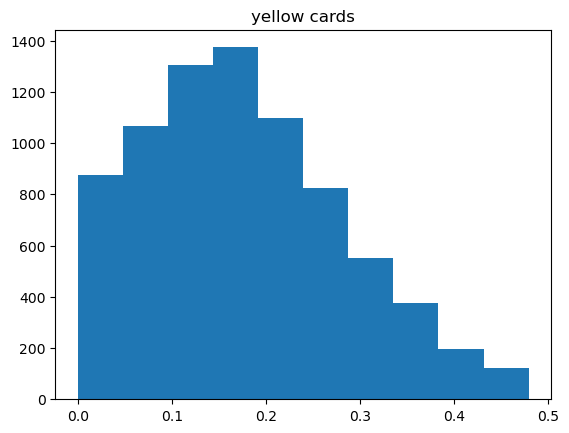

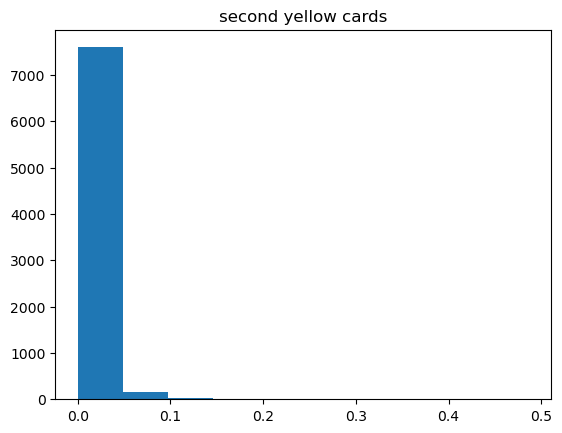

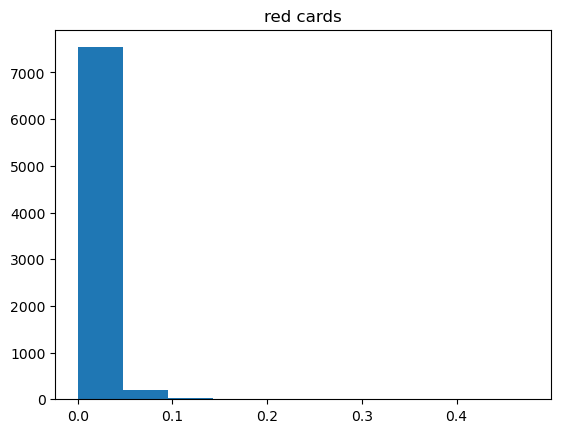

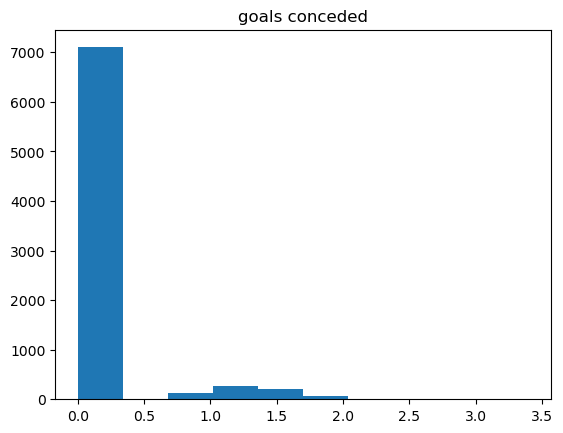

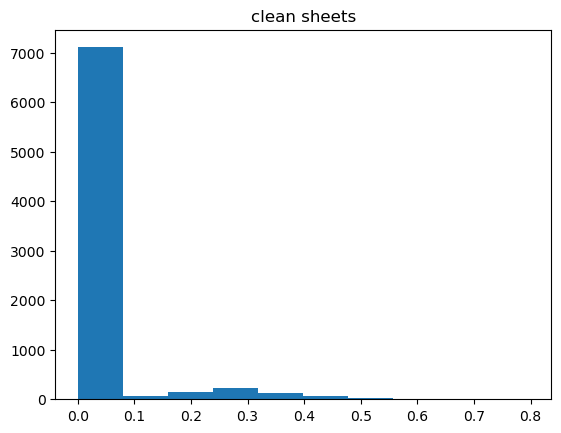

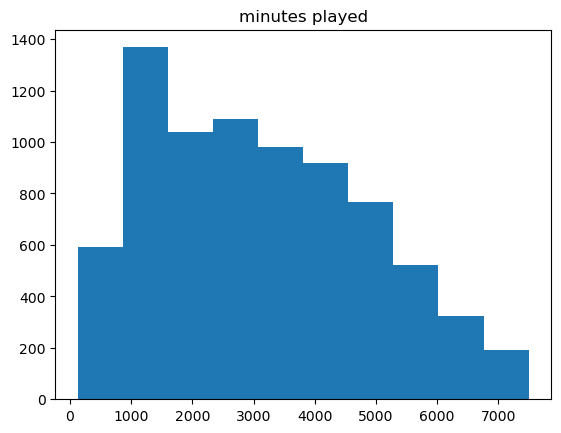

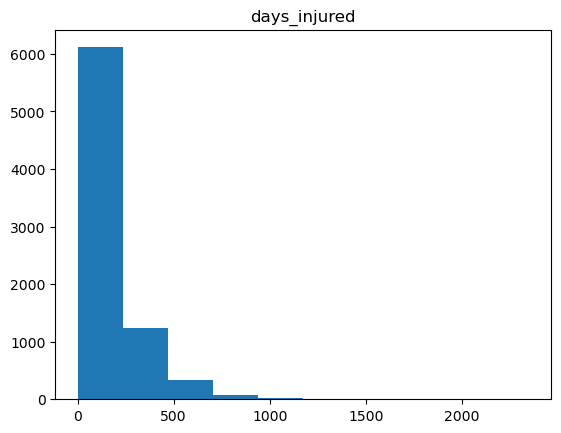

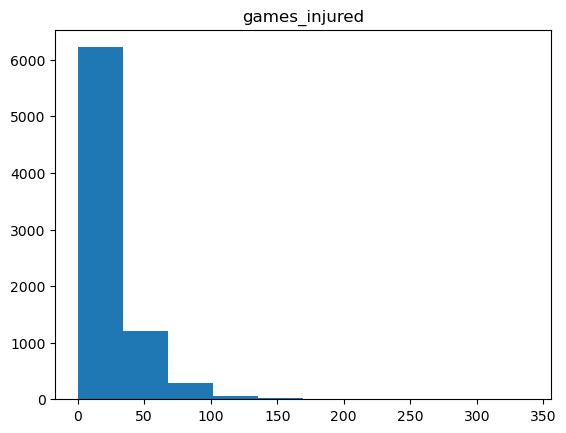

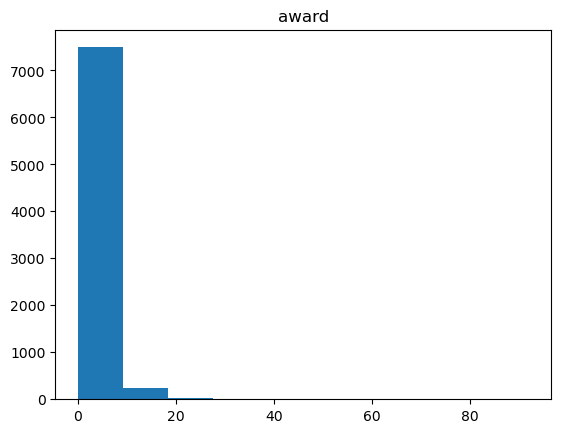

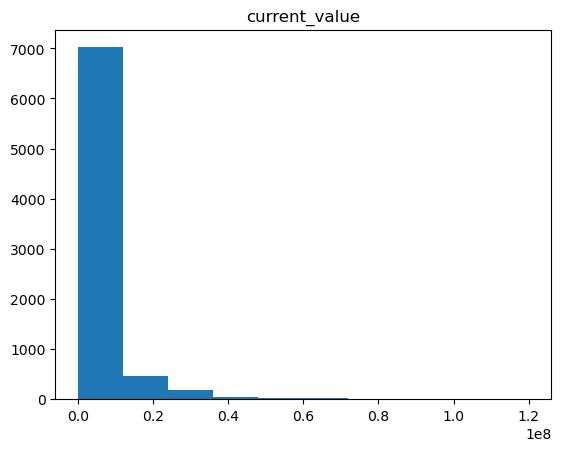

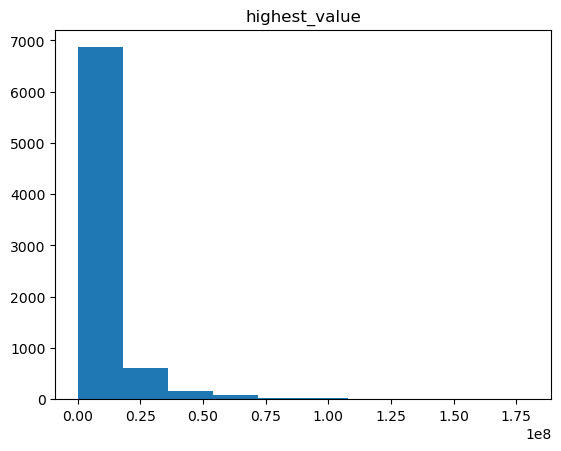

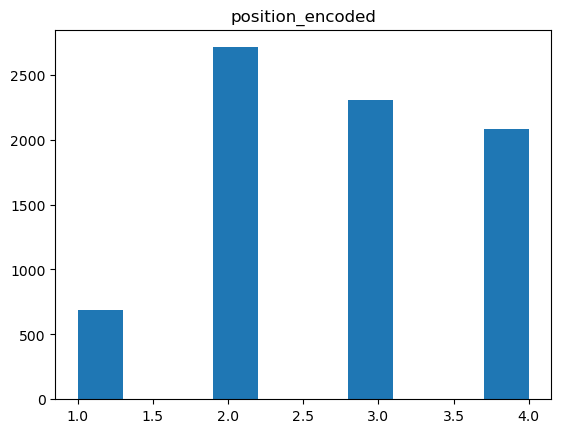

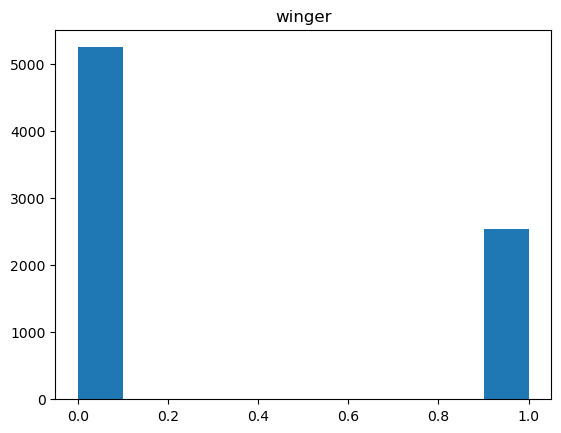

In [55]:
for i in numeric_features:
    plt.hist(df[i]);
    plt.title(i)
    plt.show()

In [56]:
df.shape

(5526, 11)

In [57]:
# df = df[df['Year']>=1999]

In [58]:
df.shape

(5397, 11)

In [56]:
# plt.figure(figsize=(15,8))
# #plt.hist(df['Price']);
# plt.hist(df[(df['Price']<=300000) & (df['Price']>5000)]['Price'], bins=100);
# #plt.hist(df[(df['Price']<=400000) & (df['Price']>=5000)]['Price'], bins=100);

In [78]:
# df = df[(df['Price']<=300000) & (df['Price']>=5000)]

In [79]:
df.shape

(3231, 11)

In [19]:
#df[df['Mileage']<1000]

In [67]:
# df['Mileage'].min()

100

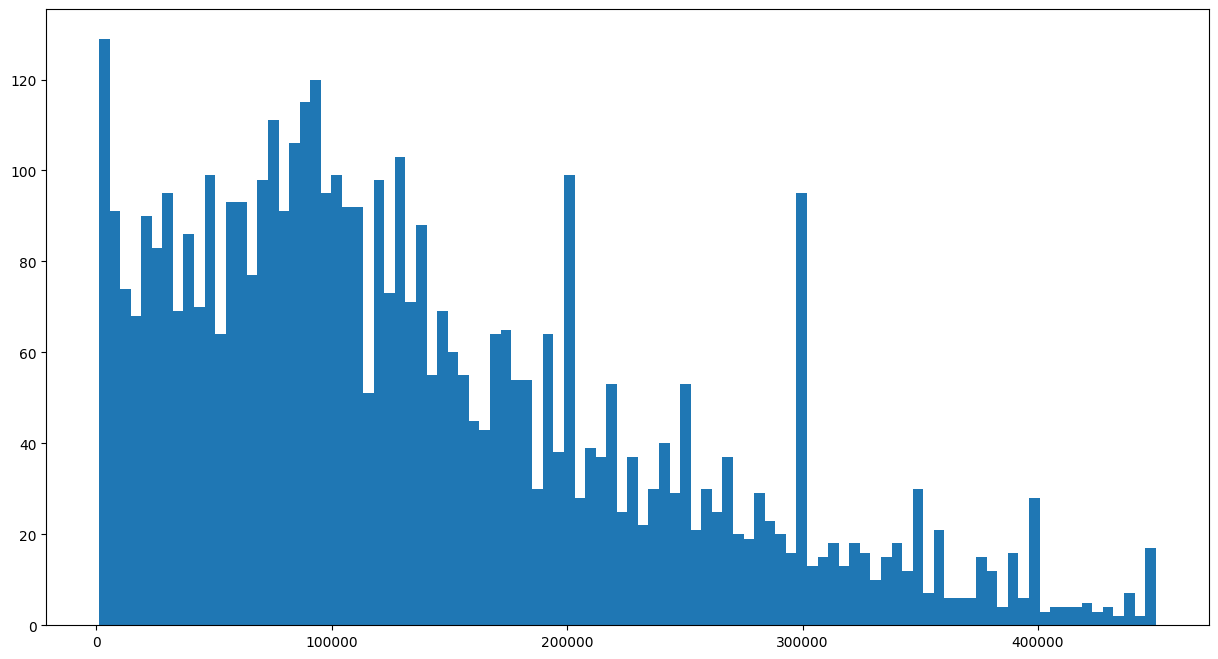

In [69]:
# plt.figure(figsize=(15,8))
# #plt.hist(df['Mileage']);
# plt.hist(df[(df['Mileage']<=450000) & (df['Mileage']>1000)]['Mileage'], bins=100);
# #plt.hist(df['Mileage'], bins=100);

In [71]:
# df = df[(df['Mileage']<=450000) & (df['Mileage']>1000)]
# df.shape

(4667, 11)

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [65]:
df.describe()

,Unnamed: 0,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,7784.000000,7784.000000,7784.000000,7784.000000,7784.000000,7784.000000,7784.000000,7784.000000,7784.000000,7784.000000,7784.000000,7784.000000,7784.000000,7784.000000,7784.000000,7.784000e+03,7.784000e+03,7784.000000,7784.000000
mean,4944.779805,181.259944,26.338274,45.838643,0.124137,0.093305,0.175712,0.004612,0.005708,0.116513,0.025222,3125.604317,130.727133,17.546377,2.095966,4.190866e+06,7.106039e+06,2.743320,0.326439
std,3108.530815,6.972764,4.542210,21.885271,0.142493,0.101939,0.107633,0.015415,0.018411,0.388431,0.087237,1745.606704,177.665932,23.829675,3.608300,9.180307e+06,1.372349e+07,0.949391,0.468940
min,1.000000,159.000000,16.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,2181.750000,176.000000,23.000000,26.000000,0.000000,0.000000,0.096257,0.000000,0.000000,0.000000,0.000000,1594.000000,0.000000,0.000000,0.000000,4.000000e+05,6.500000e+05,2.000000,0.000000
50%,4867.500000,181.240353,26.000000,47.000000,0.071362,0.065982,0.166026,0.000000,0.000000,0.000000,0.000000,2942.000000,57.500000,8.000000,1.000000,1.000000e+06,2.000000e+06,3.000000,0.000000
75%,7245.500000,186.000000,30.000000,63.000000,0.191520,0.144714,0.245744,0.000000,0.000000,0.000000,0.000000,4414.750000,205.000000,27.000000,3.000000,3.500000e+06,7.000000e+06,4.000000,1.000000
max,10753.000000,206.000000,39.000000,107.000000,0.599295,1.159794,0.479233,0.486486,0.476190,3.400000,0.796460,7497.000000,2349.000000,339.000000,92.000000,1.200000e+08,1.800000e+08,4.000000,1.000000


In [61]:
categorical_features

['team', 'position']

In [66]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [67]:
df.shape

(7784, 407)

In [70]:
df.head(2)


,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,196.0,30.0,15,0.00000,0.00000,0.069018,0.0,0.0,1.242331,0.207055,...,False,False,False,True,False,False,False,False,False,False
1,175.0,25.0,82,0.02809,0.05618,0.224719,0.0,0.0,0.000000,0.000000,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
df.drop("Unnamed: 0", inplace=True, axis=1)

#### 3. Feature selection

In [27]:
# sns.heatmap(df.corr(), annot=True);

In [74]:
correlation = df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.820141
appearance             0.408191
minutes played         0.386720
award                  0.270023
                         ...   
red cards             -0.029879
clean sheets          -0.061245
position_Goalkeeper   -0.070733
goals conceded        -0.072498
age                   -0.096863
Name: current_value, Length: 406, dtype: float64


In [75]:
# Set the correlation threshold
threshold = 0.3  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'current_value', 'highest_value'], dtype='object')

In [77]:
selected_features = ['appearance', 'minutes played', 'current_value', 'highest_value']

In [80]:
df = df[selected_features]
df.head()

,appearance,minutes played,current_value,highest_value
0,15,1304,1500000,22000000
1,82,6408,50000000,50000000
2,63,5031,40000000,80000000
3,68,4762,25000000,70000000
4,70,5471,15000000,35000000


#### 4. Prepare train and test data

In [81]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
X.shape

(7784, 3)

## Buliding the Model

In [83]:
model = LinearRegression()

## Train the Model

In [84]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [85]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [86]:
model.coef_

array([-283903.24865493, 1397747.47075697, 7238726.87037176])

In [87]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-2.839032e+05
minutes played,1.397747e+06
highest_value,7.238727e+06


In [88]:
print(model.intercept_) 

4173109.0412718803


In [89]:
# coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
# coeff_df

NameError: name 'lasso_model' is not defined

## Evaluating the Model 

1. Mean Square Error

In [90]:
y_base = [y_train.mean()] * len(y_test)

In [91]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 80077594117718.42


In [92]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 26606867397249.48
Mean Squared Error for testing: 25535819362298.51


2. Mean Absolute Error

In [93]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 4905605.63580463


In [94]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 2413558.4695552248
Mean Absolute Error for testing: 2418549.291370704


3. Root Mean Squared Error

In [95]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 2214.860184256476


In [96]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 5158184.505933215
Root Mean Squared Error for testing: 5053297.869935881


4. R Square

In [97]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.6881343966073554
R Square for testing: 0.6810801707331391


#### Predictions vs. Real Values

In [98]:
predictions = model.predict(X_test_scaled)
#predictions

In [99]:
Real_Values = np.array(y_test)
#Real_Values

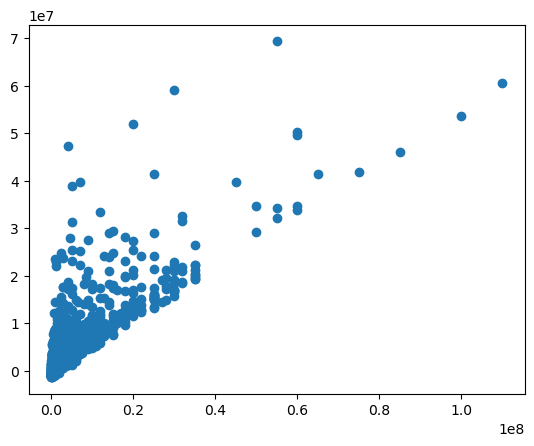

In [100]:
plt.scatter(Real_Values,predictions); 

#### Residual Histogram

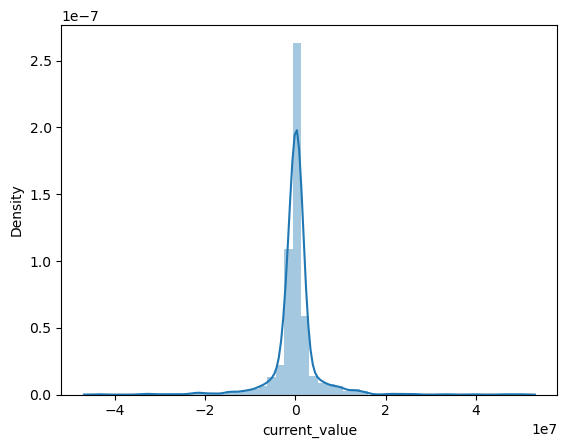

In [101]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution